In [22]:
import json 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import subprocess
import re
from PIL import Image
from copy import deepcopy
import cv2
import numpy as np

In [23]:
np.random.choice()

0.8858513398507745

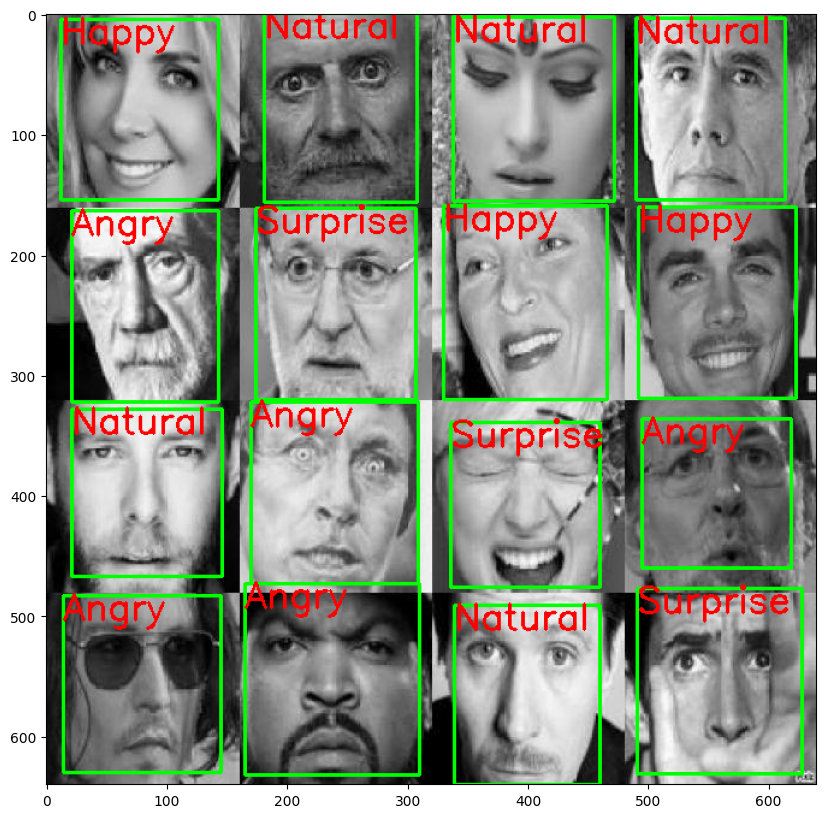

In [24]:
## image
image_file = 'pixiz-06-12-2022-14-59-28_jpg.rf.96ae3733d883d440ff28eed5af1a0eea.jpg'
image_file = 'pixiz-06-12-2022-14-59-07_jpg.rf.fd4c6bc2a76e5f29e82ba5b21ffe9b62.jpg'
image_file = '55_jpg.rf.1b4466ad4c918b8e1992cab6e7b79a4f.jpg'
image_file = 'sad88_jpg.rf.99e1a9af1022c9ac33bdf84bbba20bd3.jpg'
image_file = '55_jpg.rf.26e30bb73afef38aa70010250d9660f8.jpg'

image_files = ['pixiz-06-12-2022-14-59-28_jpg.rf.96ae3733d883d440ff28eed5af1a0eea.jpg',
                'pixiz-06-12-2022-14-59-07_jpg.rf.fd4c6bc2a76e5f29e82ba5b21ffe9b62.jpg',
                '55_jpg.rf.1b4466ad4c918b8e1992cab6e7b79a4f.jpg',
                'sad88_jpg.rf.99e1a9af1022c9ac33bdf84bbba20bd3.jpg',
                '55_jpg.rf.26e30bb73afef38aa70010250d9660f8.jpg']


multi_labels_root = "./data/full_data/splitted_by_label/MultLabel/"
image_files = os.listdir(multi_labels_root)

n_images = len(image_files)

for i in range(n_images):

    image_file = image_files[i]
    image_path = os.path.join("./data/full_data/splitted_by_label/MultLabel/",image_file)
    
    with open("../src/data/full_data/full_annotations.json","r") as file:
    
        anns = json.load(file)
    
        annotations = anns['annotations']
        categories = anns['categories']
        image_id = [img['id'] for img in anns['images'] if img['file_name'] == image_file][0]
    
        image_anntoations = []
        image_categories = []
        
        for ann in annotations:
    
    
            img_id = ann['image_id']
    
            if img_id == image_id:
                # print(ann)
                # print()
                image_anntoations.append(ann)
            

    image = cv2.imread(image_path).copy()
    # cv
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    color = (255, 0, 0)  # White in BGR
    thickness = 2
    
    
    for img_ann in image_anntoations:
    
        x_1,y_1,x_2,y_2 = [int(x) for x in img_ann['bbox']]
        x_1,y_1 = x_1-10,y_1 - 10
        x_2,y_2 = x_2+10,y_2 + 10
        cat_id = img_ann['category_id']
        cat_name = [cat['name'] for cat in categories if cat['id'] == cat_id][0]
    
        cv2.rectangle(image,(x_1,y_1),(x_1+x_2,y_1+y_2),(0,255,0),2)
        cv2.putText(image, cat_name, (x_1,y_1+20), font, font_scale, color, thickness)
    
    
    plt.figure(figsize=(10,10))
    plt.imshow(image)
    plt.show()
    break

    if i == 10:
        break

    

In [25]:
plt.imsave("multilabel_image.png",image)

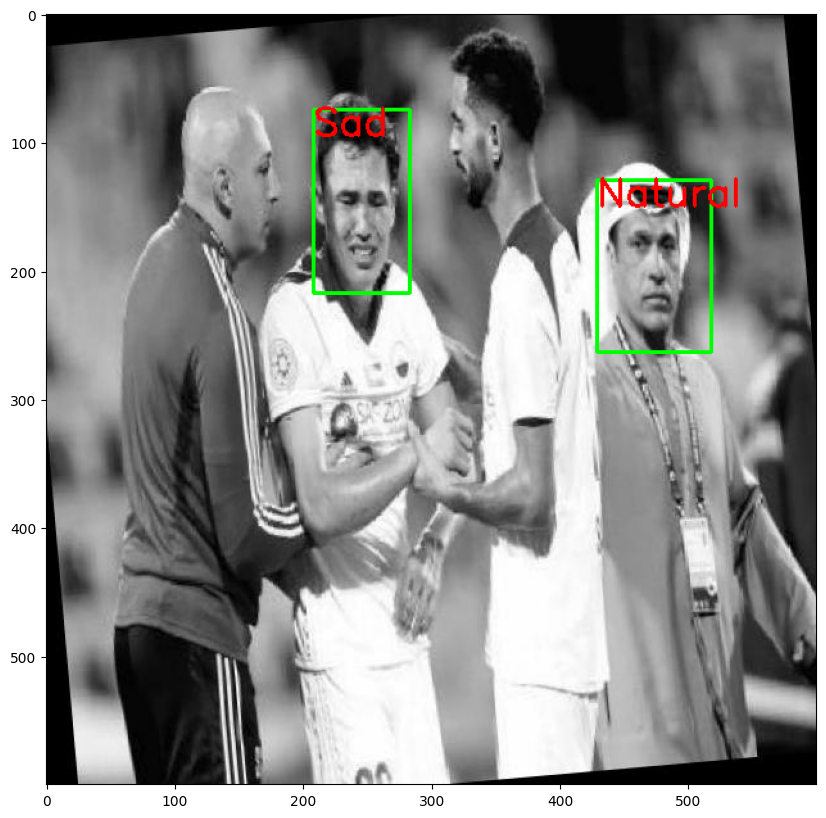

In [43]:
# read 

root = "../src/data/full_data/splitted_by_label/"
dirs = os.listdir(root)

In [44]:
counts = {}
for dir in dirs:

    path = os.path.join(root,dir)
    # command = os.path.join(path,"ls -l | wc -l")
    # pwd = os.getcwd()
    # os.chdir(path)
    output = subprocess.check_output("ls -l | wc -l",cwd=path,shell=True)
    counts[dir] = [int(output.decode("utf-8").replace("\n",""))]

counts = pd.DataFrame(counts).T.reset_index().rename(columns={"index":"Label",0:"Count"})

In [45]:
counts.sort_values("Count",inplace=True)
counts

,Label,Count
0,Learning-centered-affective-stat,1
14,emotion,1
10,Natural,97
8,Yawning,219
13,Confusion,317
11,Boredom,349
7,Frustration,366
9,Sleepy,373
2,Engaged,390
12,Sad,1895


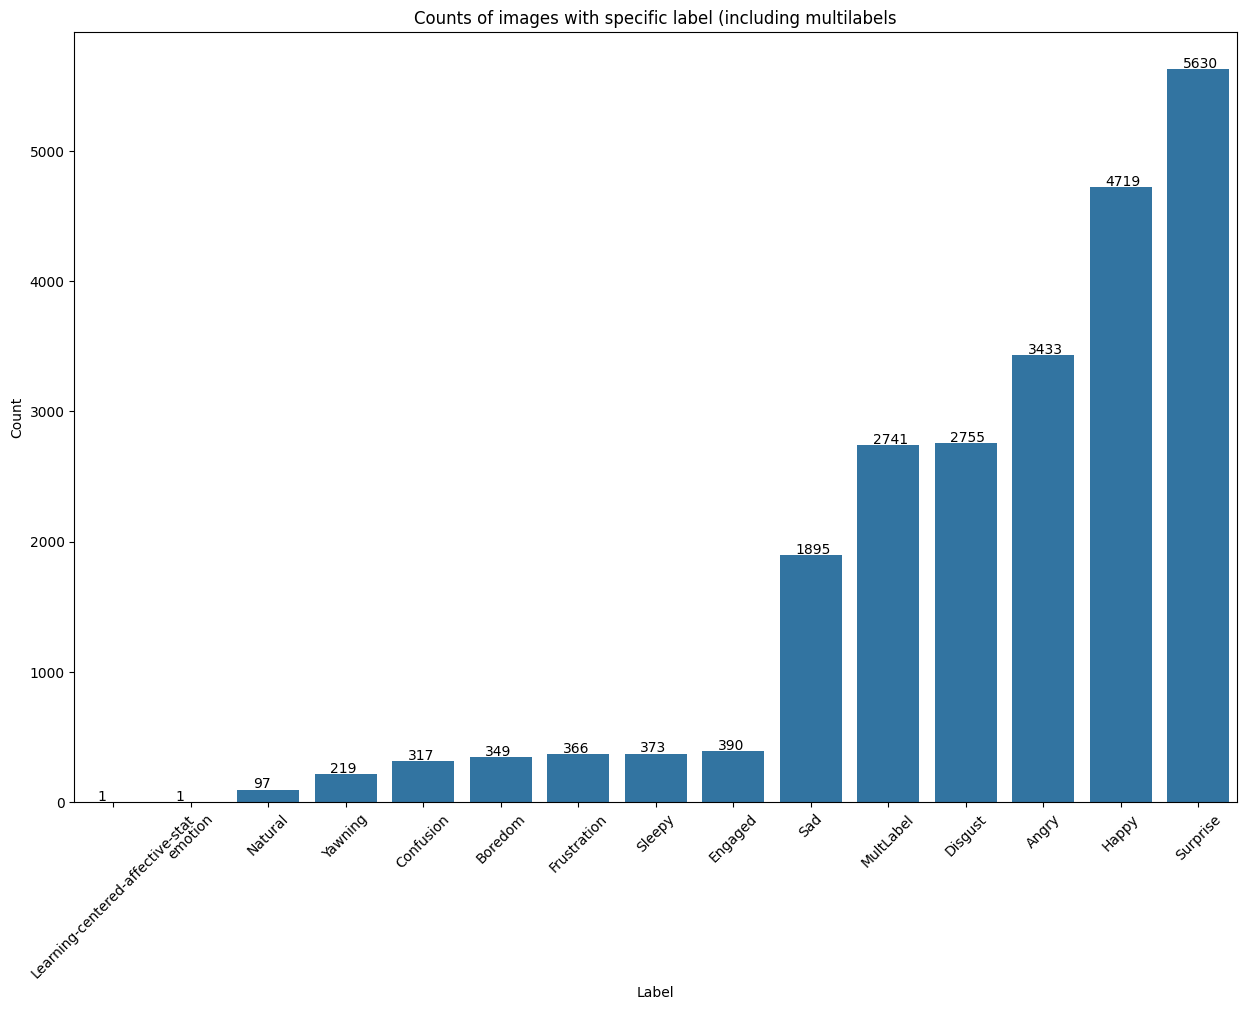

In [46]:
plt.figure(figsize=(15,10))
sns.barplot(counts,x='Label',y='Count')


for i,value in enumerate(counts['Count']):

    plt.text(i-0.2,value+10,str(value))
    plt.xticks(rotation=45)

plt.title("Counts of images with specific label (including multilabels")
plt.show()

In [47]:
counts_include_mult = {}

with open("../src/data/full_data/full_annotations.json","r") as f:

    annotations = json.load(f)
    categories = annotations['categories']
    cat_id_to_name = {cat['id']:cat['name'] for cat in categories}
    annotations = annotations['annotations']
    n_annotation = len(annotations)

    for i in range(n_annotation):

        ann = annotations[i]
        cat_id = ann['category_id']

        if cat_id not in counts_include_mult.keys():

            counts_include_mult[cat_id] = 1
            continue
            
        counts_include_mult[cat_id] += 1

    counts_include_mult = {cat_id_to_name[i]:[counts_include_mult[i]] for i in counts_include_mult}

counts_by_annotations = deepcopy(counts_include_mult)

counts_include_mult = pd.DataFrame(counts_include_mult).T.reset_index().rename(columns={"index":"Label",0:"Count"})

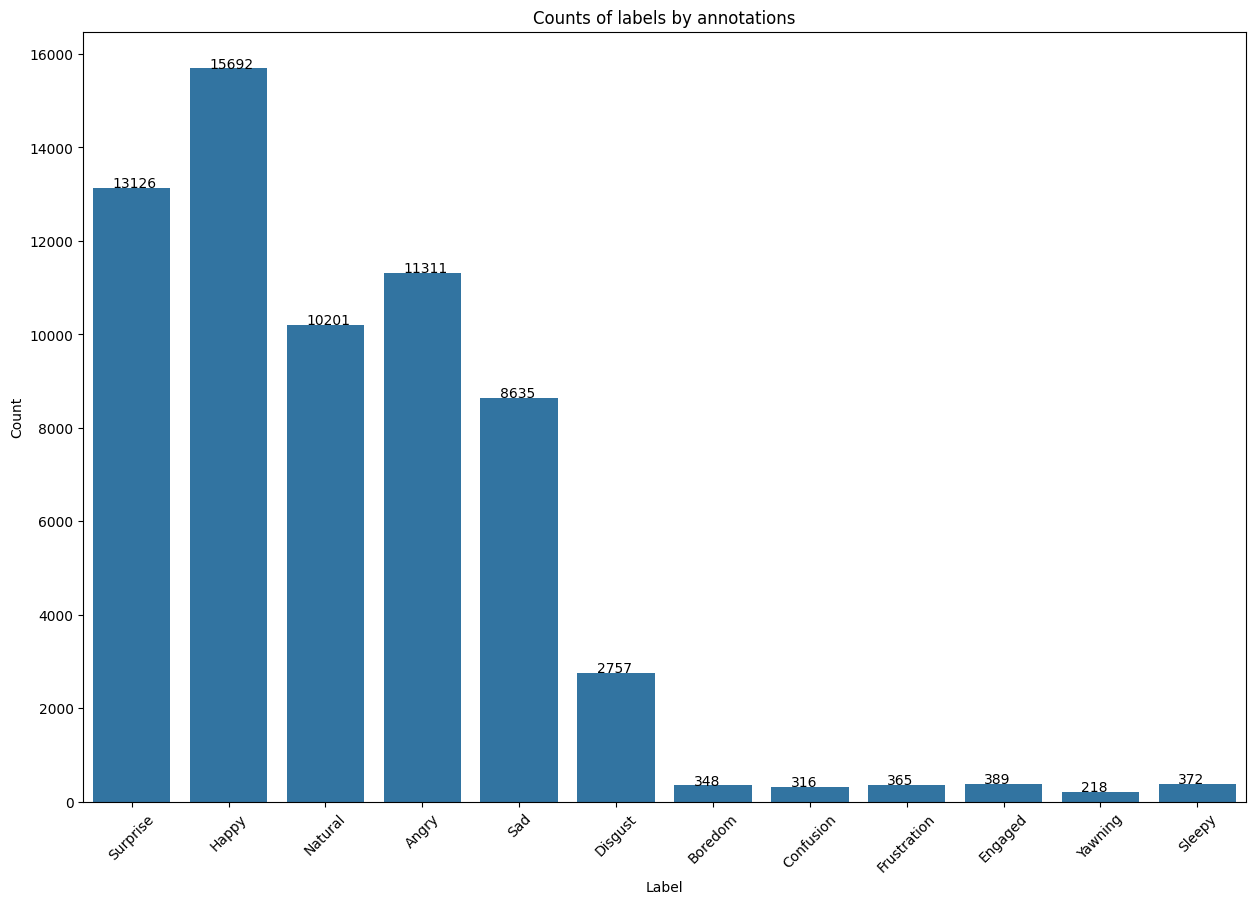

In [48]:
 

plt.figure(figsize=(15,10))
sns.barplot(counts_include_mult,x='Label',y='Count')


for i,value in enumerate(counts_include_mult['Count']):

    plt.text(i-0.2,value+10,str(value))
    plt.xticks(rotation=45)

plt.title("Counts of labels by annotations")
plt.show()


In [35]:
# concat 
concat_dict = {"Happy":"Positive",
              "Surprise":"Surprise",
              "Natural":"Natural",
              "Angry":"Negative",
              "Sad":"Negative",
              "Disgust":"Negative",
              "Boredom":"Negative",
              "Confusion":"Negative",
              "Frustration":"Negative",
              "Engaged":"Positive",
              "Yawning":"Negative",
              "Sleepy":"Negative"}

In [36]:
counts_include_mult['NewLabels'] = counts_include_mult['Label'].map(concat_dict)
couns_by_new_labels = counts_include_mult.groupby("NewLabels",as_index=False)['Count'].sum()

In [37]:
couns_by_new_labels.NewLabels.values

array(['Natural', 'Negative', 'Positive', 'Surprise'], dtype=object)

<Axes: xlabel='NewLabels', ylabel='Count'>

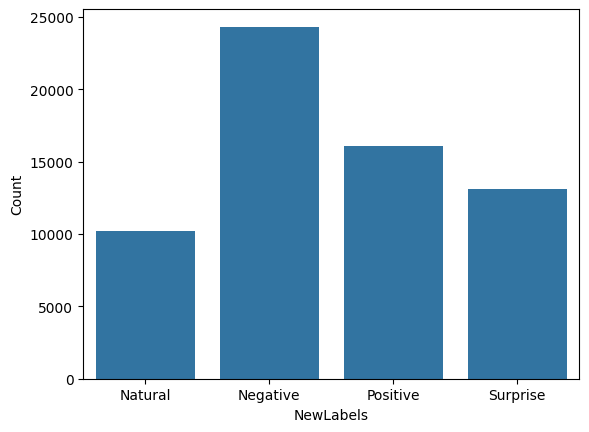

In [38]:
sns.barplot(couns_by_new_labels,x='NewLabels',y='Count')

In [39]:
couns_by_new_labels.Count.sum()

63730

In [40]:
couns_by_new_labels

,NewLabels,Count
0,Natural,10201
1,Negative,24322
2,Positive,16081
3,Surprise,13126


## Old version

In [27]:
perc_counts = counts.copy()
total_count = sum(list(counts.values()))

for key in perc_counts:
    perc_counts[key] = round(perc_counts[key]/total_count*100,3) 

In [50]:
counts_df = pd.DataFrame(list(counts.values()),list(counts.keys())).reset_index().rename(columns={"index":"Emotion",0:'Count'})

In [51]:
counts_df

,Emotion,Count
0,Angry,4031
1,Disgust,2757
2,Happy,5340
3,Natural,848
4,Sad,2189
5,Surprise,6098
6,Boredom,348
7,Confusion,316
8,Engaged,389
9,Frustration,365


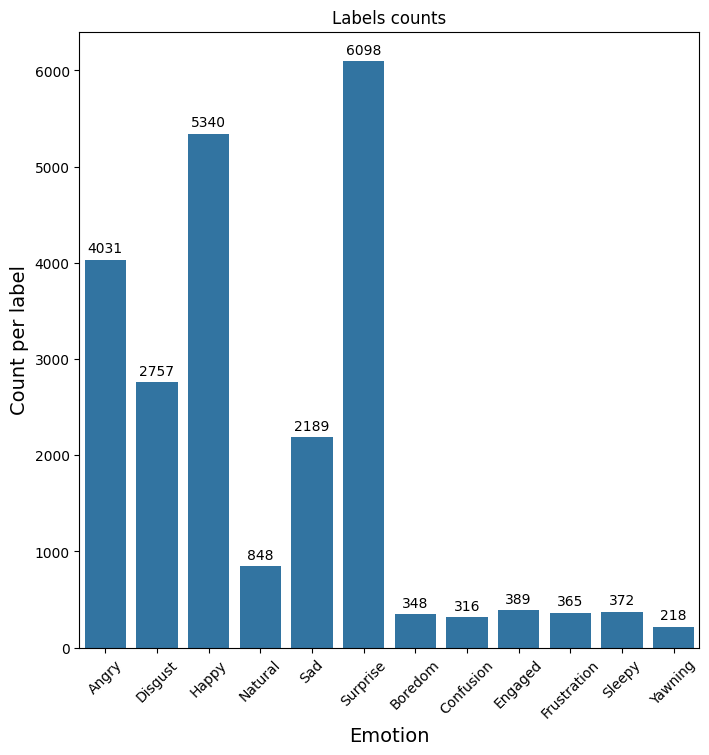

In [59]:

# Defining the plot size
plt.figure(figsize=(8, 8))
 
# Defining the values for x-axis, y-axis
# and from which dataframe the values are to be picked
plots = sns.barplot(x="Emotion", y="Count", data=counts_df)
 
# Iterating over the bars one-by-one
for bar in plots.patches:
   
  # Using Matplotlib's annotate function and
  # passing the coordinates where the annotation shall be done
  # x-coordinate: bar.get_x() + bar.get_width() / 2
  # y-coordinate: bar.get_height()
  # free space to be left to make graph pleasing: (0, 8)
  # ha and va stand for the horizontal and vertical alignment
    plots.annotate(format(bar.get_height(), '.0f'), 
                   (bar.get_x() + bar.get_width() / 2, 
                    bar.get_height()), ha='center', va='center',
                   size=10, xytext=(0, 8),
                   textcoords='offset points')
 
# Setting the label for x-axis
plt.xlabel("Emotion", size=14)
plt.xticks(rotation=45)
 
# Setting the label for y-axis
plt.ylabel("Count per label", size=14)
 
# Setting the title for the graph
plt.title("Labels counts")
 
# Finally showing the plot
plt.show()


In [63]:
print(counts_df.Emotion.values)

['Angry' 'Disgust' 'Happy' 'Natural' 'Sad' 'Surprise' 'Boredom'
 'Confusion' 'Engaged' 'Frustration' 'Sleepy' 'Yawning']


In [64]:
import numpy as np

In [67]:
np.random.choice?

Docstring:
choice(a, size=None, replace=True, p=None)

Generates a random sample from a given 1-D array

.. versionadded:: 1.7.0

.. note::
    New code should use the ``choice`` method of a ``default_rng()``
    instance instead; please see the :ref:`random-quick-start`.

Parameters
----------
a : 1-D array-like or int
    If an ndarray, a random sample is generated from its elements.
    If an int, the random sample is generated as if it were ``np.arange(a)``
size : int or tuple of ints, optional
    Output shape.  If the given shape is, e.g., ``(m, n, k)``, then
    ``m * n * k`` samples are drawn.  Default is None, in which case a
    single value is returned.
replace : boolean, optional
    Whether the sample is with or without replacement. Default is True,
    meaning that a value of ``a`` can be selected multiple times.
p : 1-D array-like, optional
    The probabilities associated with each entry in a.
    If not given, the sample assumes a uniform distribution over all
    entr